**Random Forest** is a** supervised **machine learning algorithm used for both **classification and regression** tasks. It is an ensemble method that builds **multiple decision trees** and **merges them to get a more accurate and stable prediction.**

Imagine you're trying to decide if a movie is good or bad. Instead of asking just one friend (who might be biased or wrong), you ask 100 friends from different backgrounds and take a majority vote.

This is exactly what Random Forest does—it asks multiple "decision trees", each trained on random parts of the data, and takes the average or majority vote.

1)**Bootstrapped data**:Take random samples Data from Original Dataset.

2) each tree, when Splitting nodes,only a Rendom Subset of features is consider
this intoduces more Diversity among Trees.
Trees are grown Fully without Pruning(We let each tree go as deep as needed to fit the data perfectly)

3) For classification: Majority vote amaong Trees.
For regression: Average of all Tree output






# **let's take Bollywood Example: Predicting if a person will like a Bollywood movie**

📦 Input Features (Just like dataset columns):
Each movie has these features:

🎭 Genre (Romance, Action, Comedy, etc.)

👨‍🎤 Lead Actor (Shah Rukh Khan, Salman Khan, etc.)

🎬 Director (Rohit Shetty, Karan Johar, etc.)

📈 Box Office Collection

🧠 IMDB Rating

🕐 Movie Length

🎶 Music Composer

🗓️ Release Year

And the label is:

🎯 Liked by the viewer? (Yes or No)



| Random Forest Concept | Bollywood Analogy                                     |
| --------------------- | ----------------------------------------------------- |
| Decision Tree         | One movie critic’s opinion                            |
| Forest of Trees       | A panel of different critics                          |
| Bootstrapping         | Each critic sees a different subset of movies         |
| Random Features       | Each critic makes decisions based on different clues  |
| No Pruning            | Critics make full-length decisions, even complex ones |
| Voting                | Final decision = majority of critics’ opinion         |



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Create a simulated dataset
data = {
    'Genre': ['Action', 'Romance', 'Comedy', 'Action', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Drama', 'Action'],
    'Lead_Actor': ['SRK', 'Salman', 'Aamir', 'Ranbir', 'SRK', 'Ranveer', 'Akshay', 'Ayushmann', 'Aamir', 'Salman'],
    'Director': ['Rohit', 'Karan', 'Rajkumar', 'Rohit', 'Imtiaz', 'Zoya', 'Neeraj', 'Shoojit', 'Rajkumar', 'Rohit'],
    'Box_Office_Cr': [200, 180, 160, 220, 90, 150, 170, 130, 100, 210],
    'IMDB_Rating': [7.5, 6.8, 8.2, 7.9, 6.0, 7.2, 7.1, 8.0, 6.5, 7.8],
    'Music': ['Pritam', 'Arijit', 'Amit', 'Vishal', 'Amit', 'Shankar', 'Ajay-Atul', 'Amit', 'Arijit', 'Pritam'],
    'Length_min': [140, 150, 160, 145, 170, 155, 148, 142, 165, 150],
    'Year': [2019, 2018, 2017, 2020, 2016, 2021, 2022, 2019, 2015, 2020],
    'Liked': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df.head()


,Genre,Lead_Actor,Director,Box_Office_Cr,IMDB_Rating,Music,Length_min,Year,Liked
0,Action,SRK,Rohit,200,7.5,Pritam,140,2019,Yes
1,Romance,Salman,Karan,180,6.8,Arijit,150,2018,No
2,Comedy,Aamir,Rajkumar,160,8.2,Amit,160,2017,Yes
3,Action,Ranbir,Rohit,220,7.9,Vishal,145,2020,Yes
4,Drama,SRK,Imtiaz,90,6.0,Amit,170,2016,No


In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in ['Genre', 'Lead_Actor', 'Director', 'Music', 'Liked']:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop('Liked', axis=1)  # Features
y = df['Liked']               # Target variable (Liked or Not)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.0
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


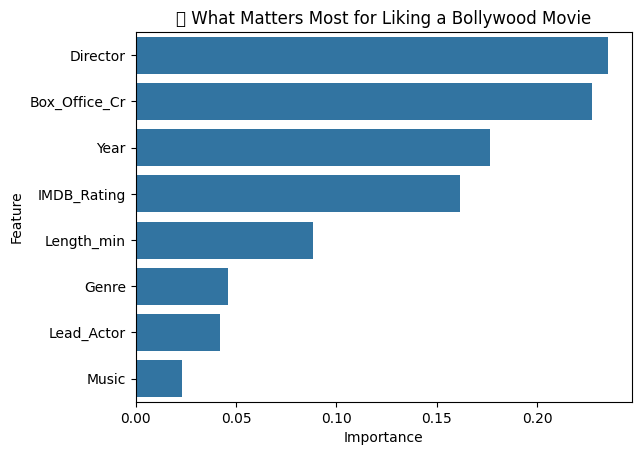

In [ ]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('🎯 What Matters Most for Liking a Bollywood Movie')
plt.show()


In [ ]:
# Define separate LabelEncoders
le_genre = LabelEncoder()
le_actor = LabelEncoder()
le_director = LabelEncoder()
le_music = LabelEncoder()
le_liked = LabelEncoder()

# Encode categorical columns
df['Genre'] = le_genre.fit_transform(df['Genre'])
df['Lead_Actor'] = le_actor.fit_transform(df['Lead_Actor'])
df['Director'] = le_director.fit_transform(df['Director'])
df['Music'] = le_music.fit_transform(df['Music'])
df['Liked'] = le_liked.fit_transform(df['Liked'])


In [ ]:
# Let's make a manual input for prediction
sample_movie = pd.DataFrame({
    'Genre': [le.transform(['Action'])[0]],
    'Lead_Actor': [le.transform(['SRK'])[0]],
    'Director': [le.transform(['Rohit'])[0]],
    'Box_Office_Cr': [210],
    'IMDB_Rating': [7.9],
    'Music': [le.transform(['Pritam'])[0]],
    'Length_min': [150],
    'Year': [2022]
})

# Predict if the movie will be liked
prediction = model.predict(sample_movie)
print("🎬 Prediction: ", "Liked ✅" if prediction[0] == 1 else "Not Liked ❌")


ValueError: y contains previously unseen labels: 'Action'